In [1]:
import extcolors
import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import requests

from PIL import Image
from environment.settings import config

dataset_dir = config['DATASET_DIR']
database_dir = config['DATABASE_DIR']

In [2]:
def display_artwork(url):
    response = requests.get(url)
    image = Image.open(io.BytesIO(response.content))
    return image

In [3]:
Academy = pd.read_csv(dataset_dir+'Academy.csv')
Apprenticeship = pd.read_csv(dataset_dir+'Apprenticeship.csv')
Artist = pd.read_csv(dataset_dir+'Artist.csv')
ArtistEducation = pd.read_csv(dataset_dir+'ArtistEducation.csv')
ArtistMovement = pd.read_csv(dataset_dir+'ArtistMovements.csv')
ArtistPictures = pd.read_csv(dataset_dir+'ArtistPicture.csv')
ArtistSpecialization = pd.read_csv(dataset_dir+'ArtistSpecializations.csv')
Artwork = pd.read_csv(dataset_dir+'Artwork.csv')
Generated = pd.read_csv(dataset_dir+'Generated.csv')
Medium = pd.read_csv(dataset_dir+'Medium.csv')
Movement = pd.read_csv(dataset_dir+'Movement.csv')
Place = pd.read_csv(dataset_dir+'Places.csv')
Recommendation = pd.read_csv(dataset_dir+'Recommendation.csv')
Specialization = pd.read_csv(dataset_dir+'specialization.csv')

In [8]:
def url2array(url):
    response = requests.get(url)
    img = Image.open(io.BytesIO(response.content))
    return np.array(img)

def url2img(url):
    response = requests.get(url)
    img = Image.open(io.BytesIO(response.content))
    return img

In [9]:
img_series = Artwork.image_url[0:5].apply(lambda x: url2img(x))

In [10]:
colors = extcolors.extract_from_image(img_series[4])
rgb_colors = list(map(lambda x: x[0], colors[0]))

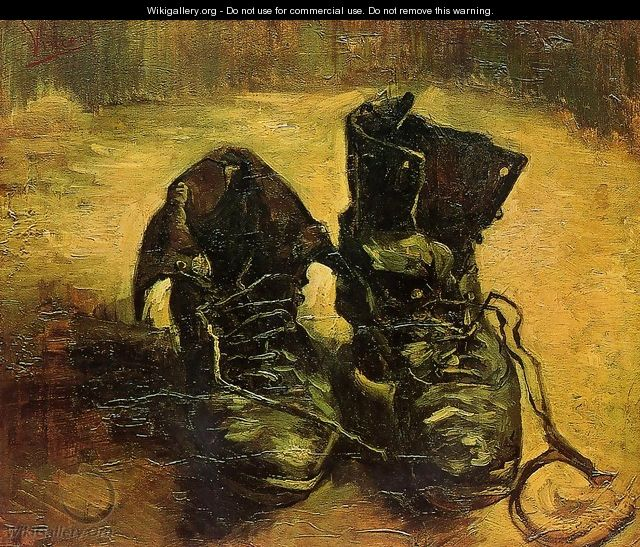

In [17]:
img_series[4]

In [16]:
x = np.array([0,0,1,1])
y = np.array([0,1,1,0])

fig = go.Figure()

for i, color in enumerate(rgb_colors):
    sc = go.Scatter(
            x=x, y=y, showlegend=False,
            fill='toself', mode='lines',
            fillcolor='rgb'+str(color)
         )
    fig.add_trace(sc)
    x += 1    

fig

In [23]:
color_palette = {'black':      (0, 0, 0),
                 'silver':     (192, 192, 192),
                 'gray': 	   (128, 128, 128),
                 'beige':      (255, 218, 185),
                 'white': 	   (255, 255, 255),
                 'maroon': 	   (128, 0, 0),
                 'lightbrown': (205, 133, 63),
                 'red': 	   (255, 0, 0),
                 'lightred':   (240, 128, 128),
                 'purple': 	   (128, 0, 128),
                 'fuchsia':    (255, 0, 255),
                 'green': 	   (0, 128, 0),
                 'lime': 	   (0, 255, 0),
                 'olive': 	   (128, 128, 0),
                 'yellow': 	   (255, 255, 0),
                 'navy': 	   (0, 0, 128),
                 'blue': 	   (0, 0, 255),
                 'teal': 	   (0, 128, 128),
                 'aqua': 	   (0, 255, 255),
                 'orange':     (255, 165, 0)}


x = np.array([0,0,1,1])
y = np.array([0,1,1,0])

fig = go.Figure()


for i, color in enumerate(color_palette.items()):
    sc = go.Scatter(
            x=x, y=y, showlegend=False, name=color[0],
            fill='toself', mode='lines',
            fillcolor='rgb'+str(color[1])
         )
    fig.add_trace(sc)
    x += 1    

fig